### Code scritpie: **In hoeverre draagt het gedrag van Bitcoin whales bij aan het verbeteren van prijsvoorspellingen?**

BTC prijs historie dataset inladen
Bron ( )

In [29]:
# import sys
# !{sys.executable} -m pip install kagglehub


# Installeren en Importen 

In [30]:
import numpy as np
import pandas as pd
import os


In [31]:
# import kagglehub

# #Download latest version
# path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

# print("Path to dataset files:", path)

# Data verkenning

In [32]:
import pandas as pd

# Vervang 'bestandsnaam.csv' met de juiste naam van het bestand in je dataset
csv_file = os.path.join(path, "btcusd_1-min_data.csv")  # Zoek eerst de juiste bestandsnaam
df = pd.read_csv(csv_file)

# Bekijk de eerste paar rijen van de dataset
df.head()


,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6944800 entries, 0 to 6944799
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
 6   datetime   object 
dtypes: float64(6), object(1)
memory usage: 370.9+ MB


In [34]:
# Bekijk de unieke waarden in de Volume-kolom
unique_values = df["Volume"].unique()

print("Unieke waarden in de Volume-kolom:", unique_values)

Unieke waarden in de Volume-kolom: [0.0000000e+00 1.0000000e+01 1.0100000e+01 ... 2.2149100e-03 1.9466995e-01
 3.0189000e-03]


In [35]:
# Eerste timestamp
eerste_timestamp = df["Timestamp"].min()

# Laatste timestamp
laatste_timestamp = df["Timestamp"].max()

print("Eerste timestamp:", eerste_timestamp)
print("Laatste timestamp:", laatste_timestamp)


Eerste timestamp: 1325412060.0
Laatste timestamp: 1742169600.0


In [36]:
import pandas as pd

# Timestamps omzetten naar een leesbaar formaat
eerste_datum = pd.to_datetime(1325412060, unit="s")
laatste_datum = pd.to_datetime(1740614400, unit="s")

print("Eerste datum:", eerste_datum)
print("Laatste datum:", laatste_datum)


Eerste datum: 2012-01-01 10:01:00
Laatste datum: 2025-02-27 00:00:00


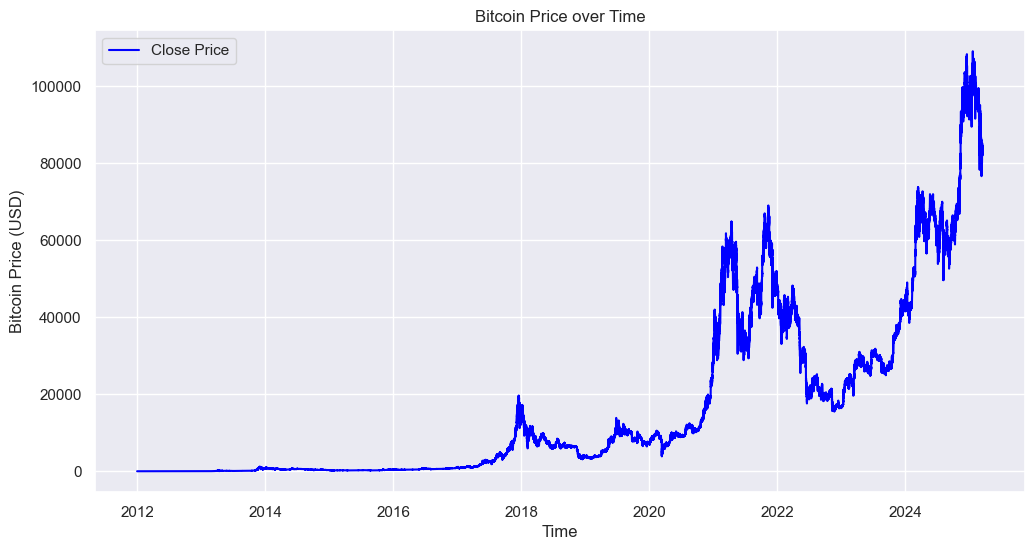

In [37]:
import matplotlib.pyplot as plt

# Zorg ervoor dat je Timestamp omgezet is naar een leesbare datum
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

# Plot de Closing Price over tijd
plt.figure(figsize=(12,6))
plt.plot(df["Timestamp"], df["Close"], label="Close Price", color="blue")

# Grafiek instellingen
plt.xlabel("Time")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price over Time")
plt.legend()
plt.grid(True)

# Weergeven
plt.show()


In [38]:
df.shape

(6944800, 7)

In [39]:
df.head()

,Timestamp,Open,High,Low,Close,Volume,datetime
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


# Inladen Memepool data

               x  mempool_tx_count                date
0  1466001900000      17325.729167 2016-06-15 14:45:00
1  1466185500000      10574.645833 2016-06-17 17:45:00
2  1466369100000       2768.901042 2016-06-19 20:45:00
3  1466552700000       4250.802083 2016-06-21 23:45:00
4  1466736300000       5839.572917 2016-06-24 02:45:00


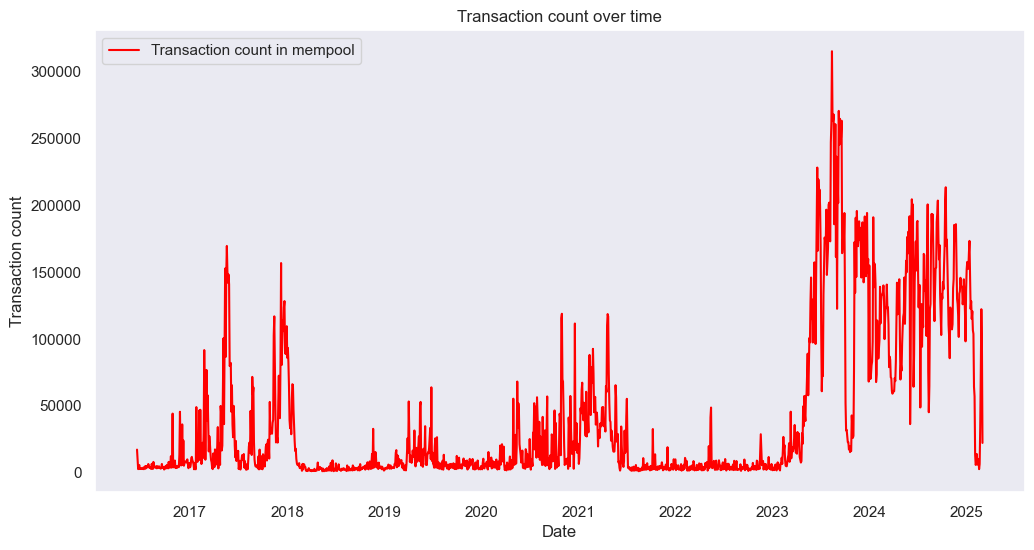

✅ Data succesvol opgeslagen in 'mempool_data.csv'


In [40]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 📌 Stap 1: JSON-bestand inlezen (vervang met je echte pad)
json_file = r"C:\Users\boris\Downloads\mempool-count.json"

try:
    with open(json_file, "r") as file:
        data = json.load(file)
except FileNotFoundError:
    print(f"❌ Bestand '{json_file}' niet gevonden. Controleer of het correct is opgeslagen.")
    exit()
except json.JSONDecodeError:
    print(f"❌ JSON-bestand '{json_file}' is niet correct geformatteerd.")
    exit()

# 📌 Stap 2: Controleer of "mempool-count" in de JSON-structuur zit
if "mempool-count" not in data:
    print("❌ De JSON bevat geen sleutel 'mempool-count'. Controleer de structuur van het bestand.")
    exit()

# 📌 Stap 3: Data omzetten naar een Pandas DataFrame
df_mempool = pd.DataFrame(data["mempool-count"])  # Gebruik de juiste sleutel

# 📌 Stap 4: UNIX tijdstempels (milliseconden) omzetten naar een leesbare datum
df_mempool["date"] = pd.to_datetime(df_mempool["x"], unit="ms")  # "x" bevat de UNIX-tijdstempel
df_mempool = df_mempool.rename(columns={"y": "mempool_tx_count"})  # "y" bevat het aantal transacties in de mempool

# 📌 Stap 5: Data weergeven en controleren
print(df_mempool.head())  # Laat de eerste paar rijen zien

# 📌 Stap 6: Data visualiseren in een grafiek
plt.figure(figsize=(12, 6))
plt.plot(df_mempool["date"], df_mempool["mempool_tx_count"], label="Transaction count in mempool", color="red")
plt.xlabel("Date")
plt.ylabel("Transaction count")
plt.title("Transaction count over time")
plt.legend()
plt.grid()
plt.show()

# 📌 Stap 7: Data exporteren naar een CSV-bestand als je het later wilt bekijken
df_mempool.to_csv("mempool_data.csv", index=False)
print("✅ Data succesvol opgeslagen in 'mempool_data.csv'")


# Fear & Greed index data inladen

In [41]:
import requests
import pandas as pd
from datetime import datetime
import time

def load_fear_greed_data(limit=0):
    """
    Load Fear & Greed Index data from the API
    Args:
        limit (int): Number of results to return. Use 0 for all available data
    Returns:
        DataFrame with Fear & Greed Index data
    """
    # API endpoint
    url = f"https://api.alternative.me/fng/?limit={limit}"
    
    try:
        # Make API request
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        
        # Parse JSON response
        data = response.json()
        
        # Extract the data points
        data_points = data['data']
        
        # Convert to DataFrame
        df = pd.DataFrame(data_points)
        
        # Convert timestamp to datetime
        df['date'] = pd.to_datetime(df['timestamp'].astype(int), unit='s')
        
        # Convert value to numeric
        df['value'] = df['value'].astype(int)
        
        # Reorder columns
        df = df[['date', 'value', 'value_classification']]
        
        # Sort by date
        df = df.sort_values('date')
        
        return df
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

if __name__ == "__main__":
    # Load all available data
    df = load_fear_greed_data(limit=0)
    
    if df is not None:
        # Save to CSV
        df.to_csv('fear_greed_data.csv', index=False)
        print("Data successfully saved to fear_greed_data.csv")
        print("\nFirst few rows of the data:")
        print(df.head())

Data successfully saved to fear_greed_data.csv

First few rows of the data:
           date  value value_classification
2613 2018-02-01     30                 Fear
2612 2018-02-02     15         Extreme Fear
2611 2018-02-03     40                 Fear
2610 2018-02-04     24         Extreme Fear
2609 2018-02-05     11         Extreme Fear


In [42]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


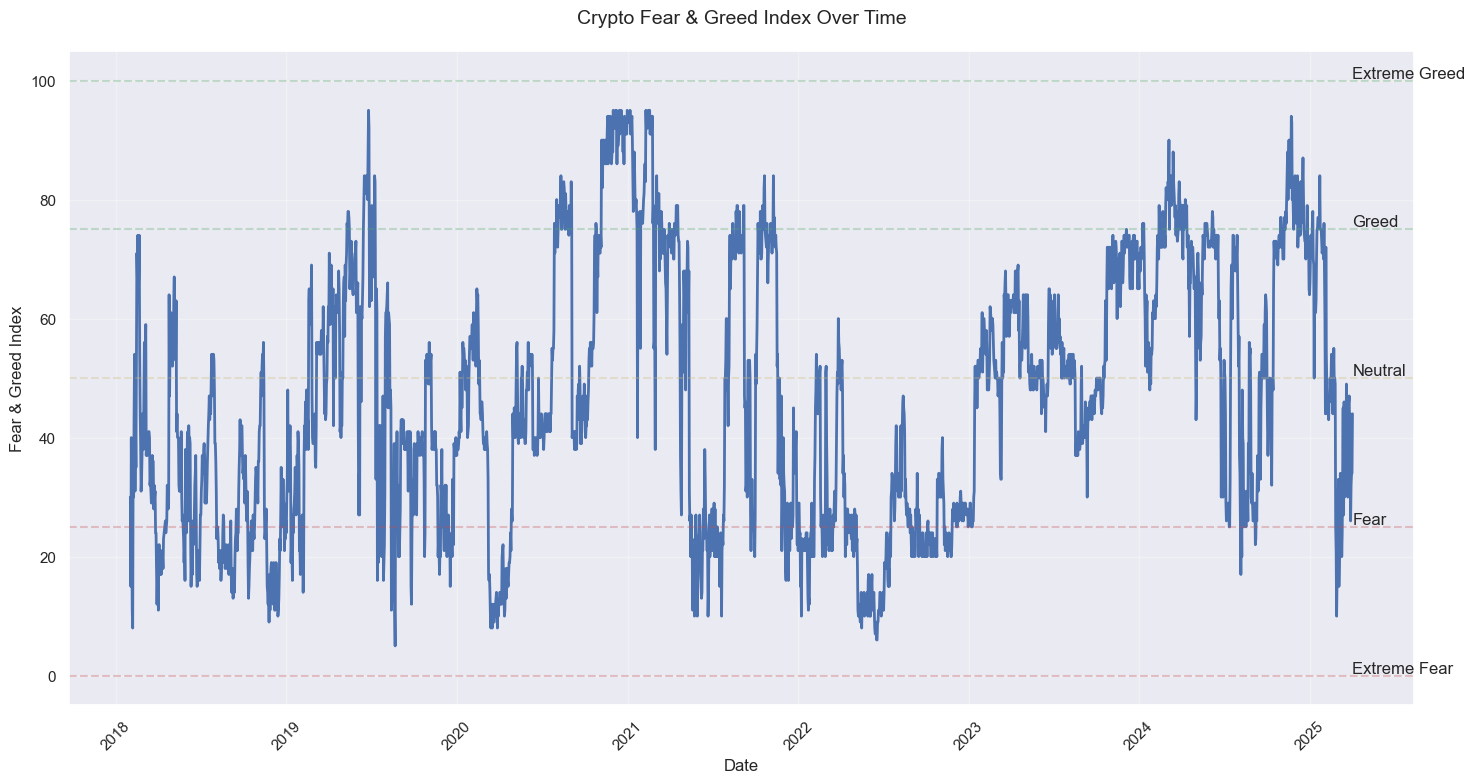

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stel de stijl in
plt.style.use('default')  # Gebruik de standaard matplotlib stijl
sns.set_theme()  # Gebruik seaborn's standaard thema

# Maak de grafiek
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['value'], linewidth=2)

# Voeg horizontale lijnen toe voor de sentiment niveaus
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=25, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=50, color='y', linestyle='--', alpha=0.3)
plt.axhline(y=75, color='g', linestyle='--', alpha=0.3)
plt.axhline(y=100, color='g', linestyle='--', alpha=0.3)

# Voeg labels toe
plt.title('Crypto Fear & Greed Index Over Time', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fear & Greed Index', fontsize=12)

# Voeg sentiment labels toe
plt.text(df['date'].max(), 0, 'Extreme Fear', verticalalignment='bottom')
plt.text(df['date'].max(), 25, 'Fear', verticalalignment='bottom')
plt.text(df['date'].max(), 50, 'Neutral', verticalalignment='bottom')
plt.text(df['date'].max(), 75, 'Greed', verticalalignment='bottom')
plt.text(df['date'].max(), 100, 'Extreme Greed', verticalalignment='bottom')

# Rotate x-axis labels voor betere leesbaarheid
plt.xticks(rotation=45)

# Voeg grid toe
plt.grid(True, alpha=0.3)

# Pas de layout aan
plt.tight_layout()

# Toon de grafiek
plt.show()